### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# Resolução do desafio realizado por Joilson Martins
# Agrupar os DataFrames para faciliar as operações.
jmlojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Calcular o faturamento por loja
faturamento = {}

for nome_loja, dados_loja in jmlojas.items():
    total_preco = dados_loja['Preço'].sum()
    faturamento[nome_loja] = total_preco

# Criar um DataFrame e exibir o resultado do faturamento por loja em formato de tabela
tabela_faturamento = pd.DataFrame(list(faturamento.items()), columns=['Loja', 'Total Preço'])
print(tabela_faturamento)

     Loja  Total Preço
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


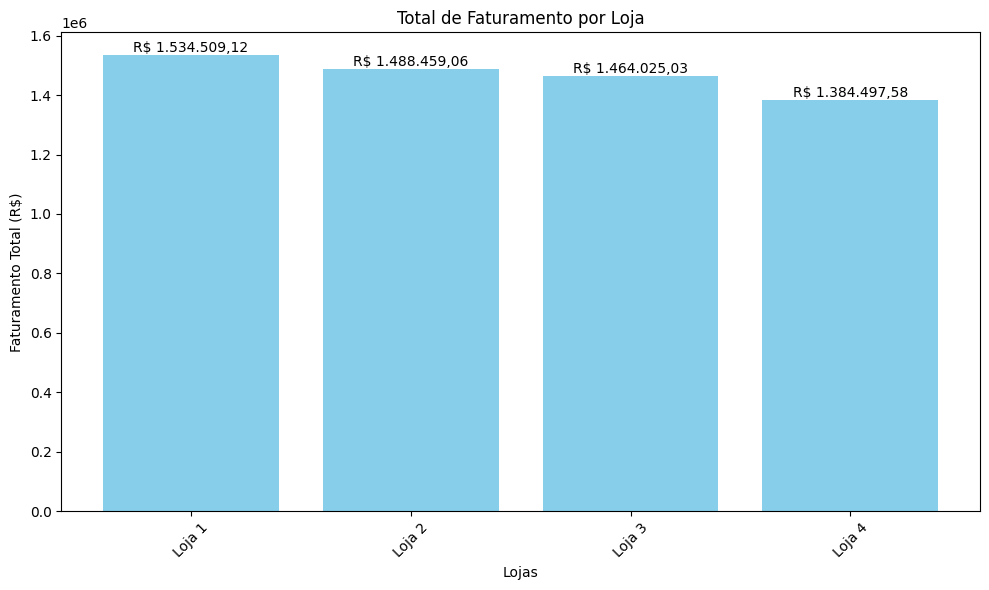

In [4]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras comparando o faturamento total por loja
plt.figure(figsize=(10, 6))
graf_barra = plt.bar(tabela_faturamento['Loja'], tabela_faturamento['Total Preço'], color='skyblue')
plt.title('Total de Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento Total (R$)')

# Função para formatar os rótulos em reais
def formatar_moeda(valor):
  return f'R$ {valor:,.2f}'.replace(',', 'x').replace('.', ',').replace('x', '.')

# Adicionar os rótulos de dados formatados
plt.bar_label(graf_barra, fmt=lambda x: formatar_moeda(x))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [5]:
# Criar um dicionário para armazenar as contagens de vendas por loja
vendas_por_categoria = {}

for nome_loja, dados_loja in jmlojas.items():
    contagem_vendas = dados_loja.groupby('Categoria do Produto')['Produto'].count() # Agrupar por categoria e contar as vendas
    vendas_por_categoria[nome_loja] = contagem_vendas # Armazenar no dicionário

# Criar um DataFrame a partir do dicionário e exibir a tabela
tabela_vendas = pd.DataFrame(vendas_por_categoria)
print(tabela_vendas.fillna(0))

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


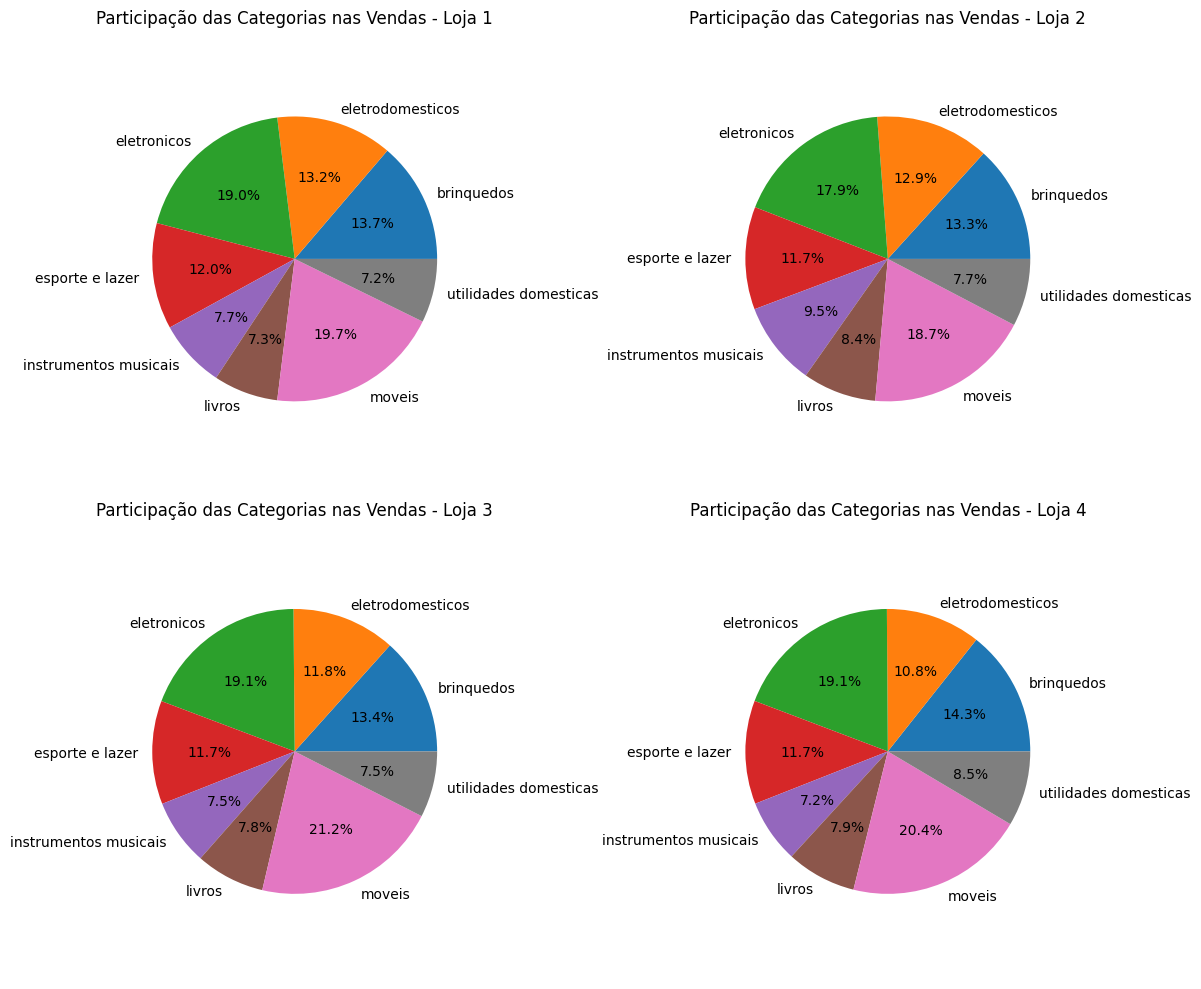

In [6]:
# Criar uma figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Lista de nomes das lojas para iteração
nomes_lojas = list(vendas_por_categoria.keys())

# Iterar sobre as lojas, obter a contagem de vendas e criar gráficos de pizza
for i, nome_loja in enumerate(nomes_lojas):
    contagem_vendas = vendas_por_categoria[nome_loja]

    # Criar o gráfico de pizza
    axs[i // 2, i % 2].pie(contagem_vendas, labels=contagem_vendas.index, autopct='%1.1f%%', startangle=0)
    axs[i // 2, i % 2].set_title(f'Participação das Categorias nas Vendas - {nome_loja}')
    axs[i // 2, i % 2].axis('equal')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [7]:
# Inicializar um dicionário para armazenar as avaliações médias por loja
avaliacao_media_por_loja = {}

# Iterar sobre o dicionário de lojas, calcular e armazenar a avaliação média
for nome_loja, dados_loja in jmlojas.items():
    avaliacao_media = dados_loja['Avaliação da compra'].mean().round(2)
    avaliacao_media_por_loja[nome_loja] = avaliacao_media

# Criar um DataFrame a partir do dicionário
tabela_avaliacao_media = pd.DataFrame(list(avaliacao_media_por_loja.items()), columns=['Loja', 'Avaliação Média'])

# Classificar a tabela da maior para a menor avaliação média e exibir a tabela
tabela_avaliacao_media = tabela_avaliacao_media.sort_values(by='Avaliação Média', ascending=False)
print(tabela_avaliacao_media)

     Loja  Avaliação Média
2  Loja 3             4.05
1  Loja 2             4.04
3  Loja 4             4.00
0  Loja 1             3.98


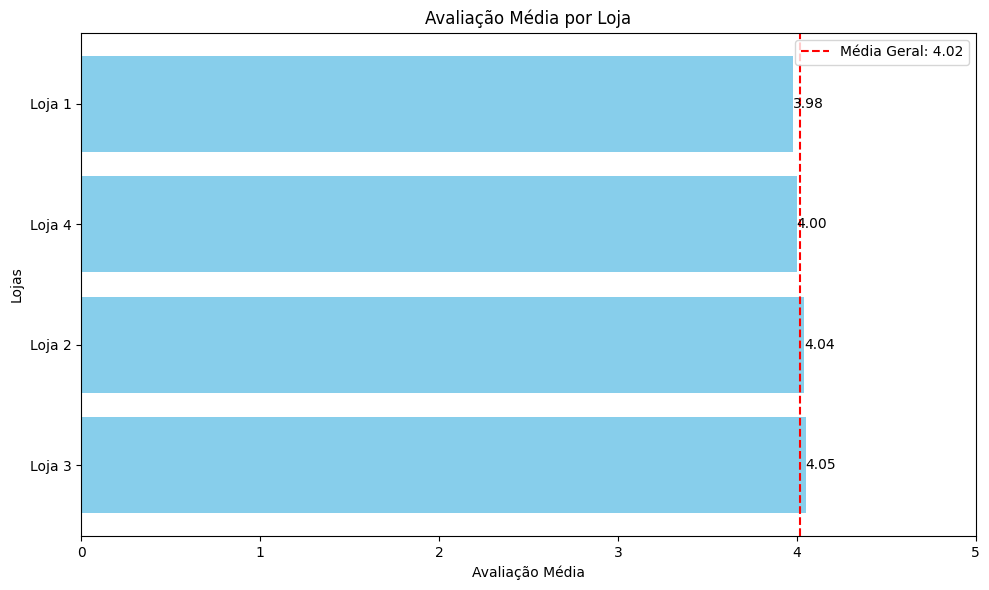

In [8]:
import matplotlib.pyplot as plt

# Calcular a média geral das avaliações
media_geral = tabela_avaliacao_media['Avaliação Média'].mean()

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(tabela_avaliacao_media['Loja'], tabela_avaliacao_media['Avaliação Média'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left')

# Adicionar linha média
plt.axvline(media_geral, color='red', linestyle='--', label=f'Média Geral: {media_geral:.2f}')

# Configurações do gráfico
plt.title('Avaliação Média por Loja')
plt.xlabel('Avaliação Média')
plt.ylabel('Lojas')
plt.xlim(0, 5)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [9]:
# Inicializar um dicionário para armazenar os produtos vendidos por loja
produtos_vendidos_por_loja = {}

# Iterar sobre o dicionário de lojas, agrupar por produto e somar as quantidades vendidas
for nome_loja, dados_loja in jmlojas.items():
    contagem_produtos = dados_loja.groupby('Produto')['Produto'].count()
    produtos_vendidos_por_loja[nome_loja] = contagem_produtos

# Criar um DataFrame a partir do dicionário
tabela_produtos = pd.DataFrame(produtos_vendidos_por_loja).fillna(0)

# Encontrar o produto mais e menos vendido de cada loja
mais_vendido_por_loja = tabela_produtos.idxmax(axis=0)
quantidade_mais_vendido_por_loja = tabela_produtos.max(axis=0)
menos_vendido_por_loja = tabela_produtos.idxmin(axis=0)
quantidade_menos_vendido_por_loja = tabela_produtos.min(axis=0)

# Criar DataFrame com os resultados desejados
tabela_final = pd.DataFrame({
    'Mais Vendido': mais_vendido_por_loja,
    'Quantidade Mais Vendido': quantidade_mais_vendido_por_loja,
    'Menos Vendido': menos_vendido_por_loja,
    'Quantidade Menos Vendido': quantidade_menos_vendido_por_loja
})

tabela_final = tabela_final.reset_index().rename(columns={'index': 'Loja'})
print(tabela_final)

     Loja              Mais Vendido  Quantidade Mais Vendido  \
0  Loja 1             Guarda roupas                       60   
1  Loja 2  Iniciando em programação                       65   
2  Loja 3             Kit banquetas                       57   
3  Loja 4                  Cama box                       62   

       Menos Vendido  Quantidade Menos Vendido  
0       Celular ABXY                        33  
1  Jogo de tabuleiro                        32  
2   Blocos de montar                        35  
3           Guitarra                        33  


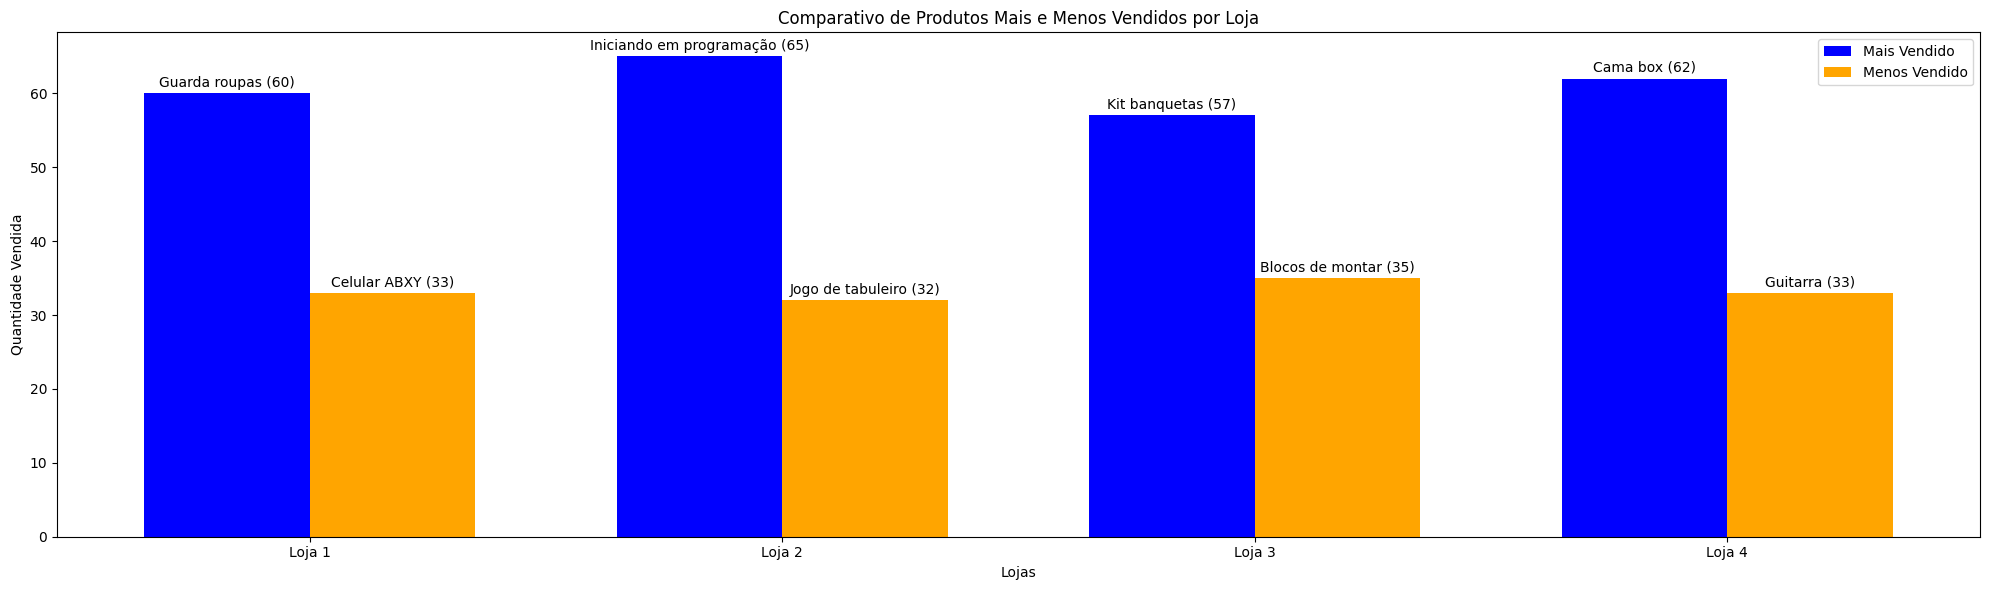

In [10]:
# Criar um DataFrame para os produtos mais e menos vendidos
produtos_comparativos = pd.DataFrame({
    'Loja': tabela_final['Loja'],
    'Produto Mais Vendido': tabela_final['Mais Vendido'],
    'Quantidade Mais Vendido': tabela_final['Quantidade Mais Vendido'],
    'Produto Menos Vendido': tabela_final['Menos Vendido'],
    'Quantidade Menos Vendido': tabela_final['Quantidade Menos Vendido']
})

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(20, 6))
bar_width = 0.35
index = range(len(produtos_comparativos))

# Criar barras para produtos mais vendidos
bars1 = ax.bar(index, produtos_comparativos['Quantidade Mais Vendido'], bar_width, label='Mais Vendido', color='blue')

# Criar barras para produtos menos vendidos, deslocadas para a direita
bars2 = ax.bar([i + bar_width for i in index], produtos_comparativos['Quantidade Menos Vendido'], bar_width, label='Menos Vendido', color='orange')

# Configurações do gráfico
ax.set_xlabel('Lojas')
ax.set_ylabel('Quantidade Vendida')
ax.set_title('Comparativo de Produtos Mais e Menos Vendidos por Loja')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(produtos_comparativos['Loja'])
ax.legend(loc='upper right')

# Adicionar anotações para os produtos e suas quantidades
for i in index:
    ax.text(i, produtos_comparativos['Quantidade Mais Vendido'][i] + 0.5,
            f"{produtos_comparativos['Produto Mais Vendido'][i]} ({produtos_comparativos['Quantidade Mais Vendido'][i]})",
            ha='center', va='bottom', color='black')

    ax.text(i + bar_width, produtos_comparativos['Quantidade Menos Vendido'][i] + 0.5,
            f"{produtos_comparativos['Produto Menos Vendido'][i]} ({produtos_comparativos['Quantidade Menos Vendido'][i]})",
            ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [11]:
# Calcular o valor médio do frete por loja
media_frete = {}

for nome_loja, dados_loja in jmlojas.items():
    media = dados_loja['Frete'].mean().round(2)
    media_frete[nome_loja] = media

# Criar um DataFrame e exibir o resultado da média do frete por loja em formato de tabela
tabela_media_frete = pd.DataFrame(list(media_frete.items()), columns=['Loja', 'Média Frete'])
print(tabela_media_frete)

     Loja  Média Frete
0  Loja 1        34.69
1  Loja 2        33.62
2  Loja 3        33.07
3  Loja 4        31.28


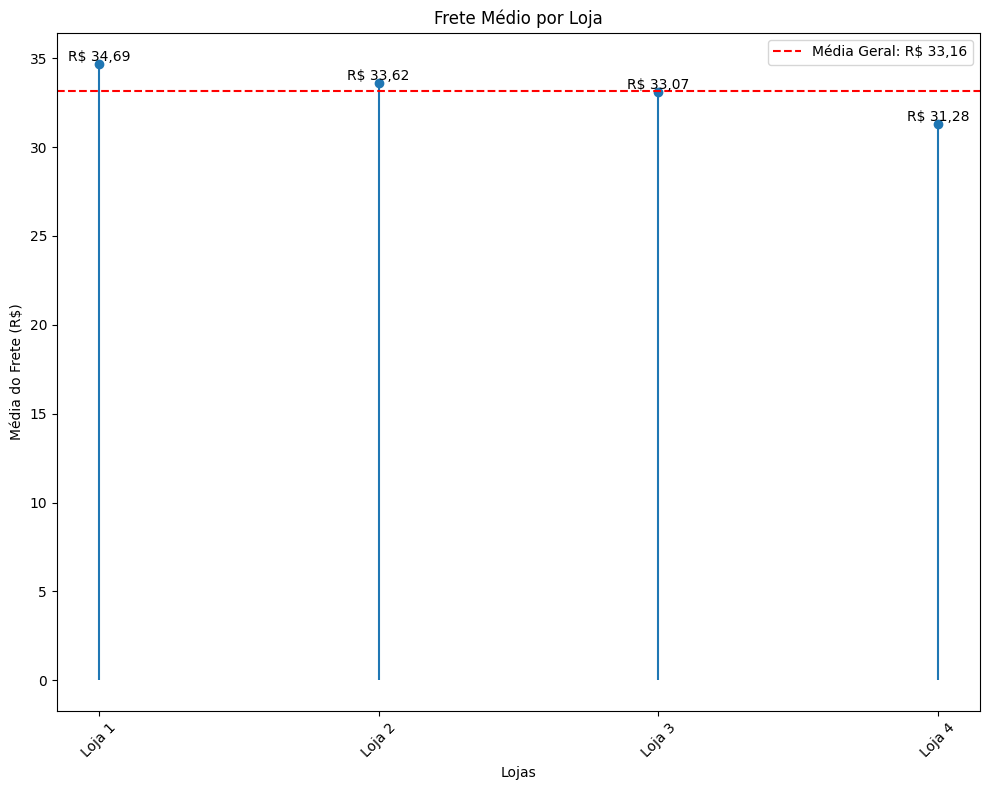

In [12]:
# Calcular a média geral do frete
media_geral = tabela_media_frete['Média Frete'].mean()

# Função para formatar os valores em reais
def formatar_moeda(valor):
  return f'R$ {valor:,.2f}'.replace(',', 'x').replace('.', ',').replace('x', '.')

# Criar o gráfico de stem
plt.figure(figsize=(10, 8))
plt.stem(tabela_media_frete['Loja'], tabela_media_frete['Média Frete'], basefmt=" ")

for i, value in enumerate(tabela_media_frete['Média Frete']):
    plt.text(i, value, formatar_moeda(value), ha='center', va='bottom')

# Adicionar linha da média geral
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral: {formatar_moeda(media_geral)}')

# Configurações do gráfico
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média do Frete (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Extra! Análise de Desempenho Geográfico

In [15]:
# Criar um DataFrame vazio para armazenar os resultados
resumo_locais = pd.DataFrame()

# Iterar sobre cada DataFrame no dicionário
for nome_loja, df in jmlojas.items():
    # Agrupar por 'Local da compra' e contar o número de produtos
    resumo = df.groupby('Local da compra')['Produto'].count().reset_index()
    resumo['Loja'] = nome_loja  # Adicionar o nome da loja ao resumo
    resumo_locais = pd.concat([resumo_locais, resumo], ignore_index=True)  # Concatenar os resultados

# Agrupar o resumo final por 'Local da compra' e somar as contagens de todas as lojas
resumo_final = resumo_locais.groupby('Local da compra')['Produto'].sum().reset_index()

# Renomear a coluna para melhor entendimento
resumo_final.rename(columns={'Produto': 'Total de Produtos Comprados'}, inplace=True)

# Exibir o resumo final
print(resumo_final)

   Local da compra  Total de Produtos Comprados
0               AC                            3
1               AL                           41
2               AM                           14
3               AP                            9
4               BA                          310
5               CE                          151
6               DF                          242
7               ES                          171
8               GO                          186
9               MA                           62
10              MG                         1102
11              MS                           82
12              MT                           80
13              PA                           81
14              PB                           46
15              PE                          181
16              PI                           40
17              PR                          473
18              RJ                         1212
19              RN                      

In [16]:
import plotly.express as px
import folium

# Configurar o mapa de calor com um mapa base dos estados do Brasil e os campos que dever ser plotados.
mapa = px.choropleth(resumo_final, geojson="https://raw.githubusercontent.com/fititnt/gis-dataset-brasil/master/uf/geojson/uf.json",
                         color="Total de Produtos Comprados", locations="Local da compra", featureidkey="properties.UF_05",
                         projection="equirectangular", labels={'Total de Produtos Comprados':'Total Produtos'}, color_continuous_scale="Rainbow")

# Exibir o mappa
mapa.update_geos(fitbounds="locations", visible=False)
mapa.show()